In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import tensorflow as tf
from numpy import *
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,datasets

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
plan_info = pd.read_csv('./ptom_third_plan.csv')

In [4]:
plan_info.dropna(how='all', inplace=True, axis=1)
plan_info.drop(['ad_start_time', 'ad_end_time', 'remark','origin'], axis=1, inplace=True)
plan_info.dropna(subset=['ad_info'],inplace=True)

In [5]:
plan_info.drop(['ad_id', 'ad_group_id', 'ad_name','media_id','plan_id','launch_op_id','bid_mode','bid_status','bid',
                'budget_mode','budget','opt_status','status','syn_time','update_time','inventory_type'], axis=1, inplace=True)

In [6]:
plan_info.head()

ad_account_id  game_id  channel_id  source_id     bid2  \
0           4003  1000840        7162     259913  1135.73   
1           4003  1000840        7162     259914  1135.08   
2           4003  1000840        7162     259915  1128.21   
3           4003  1000840        7162     259916  1180.24   
4           4003  1000840        7162     259918  1377.89   

                                             ad_info         create_time  
0  {"app_type":"APP_ANDROID","smart_bid_type":"SM...  2020-1-19 16:18:31  
1  {"app_type":"APP_ANDROID","smart_bid_type":"SM...  2020-1-19 16:18:31  
2  {"app_type":"APP_ANDROID","smart_bid_type":"SM...  2020-1-19 16:24:53  
3  {"app_type":"APP_ANDROID","smart_bid_type":"SM...  2020-1-20 14:35:23  
4  {"app_type":"APP_ANDROID","smart_bid_type":"SM...  2020-1-29 18:01:59

In [7]:
# 解析json
plan_info['ad_info'] = plan_info['ad_info'].apply(json.loads)
temp = plan_info['ad_info'].apply(pd.Series)
plan_info = pd.concat([plan_info,temp], axis=1)
plan_info.drop('ad_info', axis=1, inplace=True)

In [8]:
temp = plan_info['audience'].apply(pd.Series)
plan_info = pd.concat([plan_info,temp], axis=1)
plan_info.drop('audience', axis=1, inplace=True)

In [9]:
temp = plan_info['action'].apply(pd.Series)
plan_info = pd.concat([plan_info,temp], axis=1)
plan_info.drop('action', axis=1, inplace=True)

In [10]:
plan_info.shape

(31041, 100)

In [11]:
plan_info.dropna(how='all', inplace=True, axis=1)

In [12]:
plan_info_2 = plan_info.copy()

In [13]:
plan_info_2.drop(['game_package_batch_id','advanced_creative_type','game_package_desc','game_package_thumbnail_ids',
               'external_url','intelligent_flow_switch','audience_package_id','union_video_type','converted_time_duration',
               'roi_goal','device_type','deep_bid_type','auto_extend_targets'],axis=1,inplace=True)

In [14]:
plan_info_2.drop(['package','open_url','ad_modify_time','deep_cpabid','download_url','download_mode','id','campaign_id',
               'package','ad_create_time','start_time','ad_id','name','status','modify_time','advertiser_id','schedule_type','quick_app_url',
               'end_time','convert_id','audit_reject_reason','download_type','budget_mode','bid','pricing',
               'include_custom_actions','app_type','exclude_flow_package','aweme_fan_behaviors','business_ids','user_type',
               'activate_type','aweme_fan_accounts','aweme_fan_categories','aweme_fans_numbers','article_category',
                'flow_package','carrier','superior_popularity_type','device_brand','exclude_custom_actions','geolocation',
               'opt_status','learning_phase','district'],axis=1,inplace=True)

In [15]:
# 删除老版兴趣行为定向
plan_info_2.drop(['ad_tag','interest_tags','app_behavior_target','app_category','app_ids'],axis=1,inplace=True)

In [16]:
# 删除老版兴趣行为定向
plan_info_2.drop(['retargeting_tags'],axis=1,inplace=True)

In [17]:
plan_info_2.shape

(31041, 36)

In [18]:
groups = plan_info_2.groupby(['channel_id','source_id'])
groups.ngroups

30846

In [19]:
image_info = pd.read_csv('./image_info.csv')
launch_report = pd.read_csv('./launch_report.csv',usecols=['tdate','channel_id', 'source_id', 'amount',
       'create_role_num', 'pay_role_user_num', 'new_role_money'])

In [20]:
df = pd.merge(plan_info_2,image_info,on=['channel_id','source_id'],how='left')
df.dropna(subset=['image_id'],inplace=True)
df = df[['ad_account_id', 'game_id', 'channel_id', 'source_id', 'create_time_y',
         'bid2','budget','inventory_type', 'schedule_time', 'delivery_range','flow_control_mode',
        'smart_bid_type', 'adjust_cpa', 'cpa_bid', 'hide_if_exists', 'hide_if_converted',
        'auto_extend_enabled', 'age','gender', 'city', 'location_type', 'platform', 'launch_price','retargeting_type',
         'retargeting_tags_include','retargeting_tags_exclude', 'ac', 'android_osv','ios_osv', 
        'interest_action_mode', 'interest_categories', 'interest_words',
       'action_categories', 'action_days', 'action_scene', 'action_words',
       'image_id', 'label_ids']]

In [21]:
launch_report.sort_values(by='tdate',inplace=True)
launch_report.drop_duplicates(subset=['channel_id','source_id'],keep='first',inplace=True)

In [22]:
launch_report.shape

(31276, 7)

In [23]:
df.shape

(30169, 38)

In [24]:
df = pd.merge(df, launch_report,on=['channel_id','source_id'],how='left')
df.drop(df[df['tdate'].isna()].index,inplace=True)

In [25]:
df.shape

(28562, 43)

In [26]:
df.head()

ad_account_id  game_id  channel_id  source_id create_time_y     bid2  \
0           4003  1000840        7162     259913    2020-01-19  1135.73   
1           4003  1000840        7162     259914    2020-01-19  1135.08   
2           4003  1000840        7162     259915    2020-01-19  1128.21   
3           4003  1000840        7162     259916    2020-01-19  1180.24   
4           4003  1000840        7162     259918    2020-01-19  1377.89   

    budget                                     inventory_type  \
0   5000.0                             [INVENTORY_UNION_SLOT]   
1   5000.0        [UNION_BOUTIQUE_GAME, INVENTORY_UNION_SLOT]   
2   5000.0        [UNION_BOUTIQUE_GAME, INVENTORY_UNION_SLOT]   
3   8000.0                             [INVENTORY_UNION_SLOT]   
4  10000.0  [INVENTORY_FEED, INVENTORY_HOTSOON_FEED, INVEN...   

                                       schedule_time delivery_range  \
0  1111111111111111111111111111111111111111111111...          UNION   
1  1111111111111111111111111111111111111111111111...        DEFAULT   
2  1111111111111111111111111111111111111111111111...        DEFAULT   
3  1111111111111111111111111111111111111111111111...          UNION   
4  1110000000000000000011111111111111111111111111...        DEFAULT   

        flow_control_mode          smart_bid_type  adjust_cpa  cpa_bid  \
0  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1135.73   
1  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1135.08   
2  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1128.21   
3  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1180.24   
4  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1377.89   

   hide_if_exists hide_if_converted  auto_extend_enabled  \
0               0                AD                    0   
1               0                AD                    0   
2               0                AD                    0   
3               0                AD                    0   
4               0                AD                    0   

                                                 age       gender  \
0  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   
1  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   
2  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   
3  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   
4  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   

                                                city location_type   platform  \
0                                                 []       CURRENT  [ANDROID]   
1                                                 []       CURRENT  [ANDROID]   
2                                                 []       CURRENT  [ANDROID]   
3                                                 []       CURRENT  [ANDROID]   
4  [11, 12, 13, 14, 15, 21, 22, 23, 31, 32, 33, 3...       CURRENT  [ANDROID]   

  launch_price retargeting_type retargeting_tags_include  \
0           []             NONE                       []   
1           []             NONE                       []   
2           []             NONE                       []   
3           []             NONE                       []   
4           []             NONE                       []   

  retargeting_tags_exclude  ac android_osv ios_osv interest_action_mode  \
0                       []  []        NONE    NONE            UNLIMITED   
1                       []  []        NONE    NONE            UNLIMITED   
2                       []  []        NONE    NONE            UNLIMITED   
3                       []  []        NONE    NONE            UNLIMITED   
4                       []  []        NONE    NONE            UNLIMITED   

  interest_categories interest_words action_categories  action_days  \
0                  []             []               NaN          NaN   
1                  []             []               NaN          NaN   
2

In [27]:
df['label'] = ((df['pay_role_user_num']>0)&(df['amount']>=500)).astype(int)

In [28]:
df['label'].value_counts()

0    25633
1     2929
Name: label, dtype: int64

In [29]:
df.columns

Index(['ad_account_id', 'game_id', 'channel_id', 'source_id', 'create_time_y',
       'bid2', 'budget', 'inventory_type', 'schedule_time', 'delivery_range',
       'flow_control_mode', 'smart_bid_type', 'adjust_cpa', 'cpa_bid',
       'hide_if_exists', 'hide_if_converted', 'auto_extend_enabled', 'age',
       'gender', 'city', 'location_type', 'platform', 'launch_price',
       'retargeting_type', 'retargeting_tags_include',
       'retargeting_tags_exclude', 'ac', 'android_osv', 'ios_osv',
       'interest_action_mode', 'interest_categories', 'interest_words',
       'action_categories', 'action_days', 'action_scene', 'action_words',
       'image_id', 'label_ids', 'tdate', 'amount', 'create_role_num',
       'pay_role_user_num', 'new_role_money', 'label'],
      dtype='object')

In [30]:
df.head()

ad_account_id  game_id  channel_id  source_id create_time_y     bid2  \
0           4003  1000840        7162     259913    2020-01-19  1135.73   
1           4003  1000840        7162     259914    2020-01-19  1135.08   
2           4003  1000840        7162     259915    2020-01-19  1128.21   
3           4003  1000840        7162     259916    2020-01-19  1180.24   
4           4003  1000840        7162     259918    2020-01-19  1377.89   

    budget                                     inventory_type  \
0   5000.0                             [INVENTORY_UNION_SLOT]   
1   5000.0        [UNION_BOUTIQUE_GAME, INVENTORY_UNION_SLOT]   
2   5000.0        [UNION_BOUTIQUE_GAME, INVENTORY_UNION_SLOT]   
3   8000.0                             [INVENTORY_UNION_SLOT]   
4  10000.0  [INVENTORY_FEED, INVENTORY_HOTSOON_FEED, INVEN...   

                                       schedule_time delivery_range  \
0  1111111111111111111111111111111111111111111111...          UNION   
1  1111111111111111111111111111111111111111111111...        DEFAULT   
2  1111111111111111111111111111111111111111111111...        DEFAULT   
3  1111111111111111111111111111111111111111111111...          UNION   
4  1110000000000000000011111111111111111111111111...        DEFAULT   

        flow_control_mode          smart_bid_type  adjust_cpa  cpa_bid  \
0  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1135.73   
1  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1135.08   
2  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1128.21   
3  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1180.24   
4  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1377.89   

   hide_if_exists hide_if_converted  auto_extend_enabled  \
0               0                AD                    0   
1               0                AD                    0   
2               0                AD                    0   
3               0                AD                    0   
4               0                AD                    0   

                                                 age       gender  \
0  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   
1  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   
2  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   
3  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   
4  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   

                                                city location_type   platform  \
0                                                 []       CURRENT  [ANDROID]   
1                                                 []       CURRENT  [ANDROID]   
2                                                 []       CURRENT  [ANDROID]   
3                                                 []       CURRENT  [ANDROID]   
4  [11, 12, 13, 14, 15, 21, 22, 23, 31, 32, 33, 3...       CURRENT  [ANDROID]   

  launch_price retargeting_type retargeting_tags_include  \
0           []             NONE                       []   
1           []             NONE                       []   
2           []             NONE                       []   
3           []             NONE                       []   
4           []             NONE                       []   

  retargeting_tags_exclude  ac android_osv ios_osv interest_action_mode  \
0                       []  []        NONE    NONE            UNLIMITED   
1                       []  []        NONE    NONE            UNLIMITED   
2                       []  []        NONE    NONE            UNLIMITED   
3                       []  []        NONE    NONE            UNLIMITED   
4                       []  []        NONE    NONE            UNLIMITED   

  interest_categories interest_words action_categories  action_days  \
0                  []             []               NaN          NaN   
1                  []             []               NaN          NaN   
2

In [351]:
df_age = df.copy()

In [352]:
df_age = df_age.join(df_age['age'].str.join('|').str.get_dummies())

In [354]:
df_age['action_words'].isna().sum()

16979

In [345]:
df_age['city']=df_age['city'].apply(lambda x:[str(i) for i in x])

In [357]:
df_age['action_words'] = df_age['action_words'].apply(lambda x:x if x==x else [])
df_age['action_words']=df_age['action_words'].apply(lambda x:[str(i) for i in x])

In [359]:
df_age.shape

(28562, 49)

In [31]:
# %%time
# df_age = df_age.join(df_age['action_words'].str.join('|').str.get_dummies())

In [355]:
df_age.shape

(28562, 49)

In [347]:
df_age = df_age.join(df_age['city'].str.join('|').str.get_dummies())

In [348]:
df_age.shape

(28562, 445)

In [288]:
df_age['age'].isna().sum()

0

In [289]:
df_age['age'].value_counts()

[AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BETWEEN_41_49]                       14450
[]                                                                               4872
[AGE_BETWEEN_18_23, AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BETWEEN_41_49]     2116
[AGE_BETWEEN_18_23, AGE_BETWEEN_24_30, AGE_BETWEEN_31_40]                        1956
[AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BETWEEN_41_49, AGE_BETWEEN_18_23]     1191
                                                                                ...  
[AGE_BETWEEN_31_40, AGE_ABOVE_50, AGE_BETWEEN_41_49]                                1
[AGE_BETWEEN_31_40, AGE_ABOVE_50, AGE_BETWEEN_24_30, AGE_BETWEEN_41_49]             1
[AGE_BETWEEN_24_30, AGE_ABOVE_50, AGE_BETWEEN_31_40, AGE_BETWEEN_41_49]             1
[AGE_BETWEEN_41_49, AGE_BETWEEN_31_40, AGE_ABOVE_50, AGE_BETWEEN_24_30]             1
[AGE_BETWEEN_24_30, AGE_BETWEEN_41_49]                                              1
Name: age, Length: 79, dtype: int64

In [209]:
df_tt = df.drop(['create_time_y','tdate'],axis=1)
df_tt = df_tt[['ad_account_id','game_id','bid2','budget','inventory_type','age','label']]
df_tt['ad_account_id'] = df_tt['ad_account_id'].astype(str)
df_tt['game_id'] = df_tt['game_id'].astype(str)

In [202]:
# cols = ['inventory_type','age','city','launch_price','retargeting_tags_include','retargeting_tags_exclude','ac',
#         'interest_categories','interest_words','action_categories','action_scene','action_words']
# for col in cols:
#     df_tt[col].fillna('[]',inplace=True)
#     df_tt[col] = df_tt[col].apply(lambda x:str(x)[1:-1])

In [210]:
df_tt.head()

ad_account_id  game_id     bid2   budget  \
0          4003  1000840  1135.73   5000.0   
1          4003  1000840  1135.08   5000.0   
2          4003  1000840  1128.21   5000.0   
3          4003  1000840  1180.24   8000.0   
4          4003  1000840  1377.89  10000.0   

                                      inventory_type  \
0                             [INVENTORY_UNION_SLOT]   
1        [UNION_BOUTIQUE_GAME, INVENTORY_UNION_SLOT]   
2        [UNION_BOUTIQUE_GAME, INVENTORY_UNION_SLOT]   
3                             [INVENTORY_UNION_SLOT]   
4  [INVENTORY_FEED, INVENTORY_HOTSOON_FEED, INVEN...   

                                                 age  label  
0  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...      0  
1  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...      0  
2  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...      0  
3  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...      0  
4  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...      1

In [217]:
dftrain,dftest=train_test_split(df_tt,test_size=0.3)

## tensorflow  multi-hot

In [211]:
def sparse_from_csv(csv,key2index):
    post_tags_str=list(csv)
    table = tf.lookup.StaticHashTable(
        tf.lookup.KeyValueTensorInitializer(list(key2index.keys()),list(key2index.values())), default_value=-1) ## 这里构造了个查找表 ##
    
    split_tags=tf.strings.split(csv,"|")
    split_tags=tf.RaggedTensor.to_sparse(split_tags)
    
    return tf.SparseTensor(
        indices=split_tags.indices,
        values=table.lookup(split_tags.values), ## 这里给出了不同值通过表查到的index ##
        dense_shape=split_tags.dense_shape)

In [222]:
def multi_embedded(df,col,EMBEDDING_DIM):
    TAG_SET = list(set(df[col].sum()))  ##表示所有items的集合##
    TAG_SET.append('')
    df[col] = df[col].str.join('|')
    df[col] = df[col].str.replace(' ','')
    key2index = dict(zip(TAG_SET,range(len(TAG_SET))))
    
    embedding_params=tf.Variable(tf.random.truncated_normal([len(TAG_SET)+1,EMBEDDING_DIM]))
    tags=sparse_from_csv(df[col],key2index)
    embedded_tags=tf.nn.embedding_lookup_sparse(embedding_params,sp_ids=tags,sp_weights=None)
#     del TAG_SET
    return embedded_tags

In [223]:
embedded_age_train = multi_embedded(dftrain,'age',3)
embedded_age_test = multi_embedded(dftest,'age',3)

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [224]:
embedded_inventory_type_train = multi_embedded(dftrain,'inventory_type',3)
embedded_inventory_type_test = multi_embedded(dftest,'inventory_type',3)

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [185]:
# debug
# def sparse_from_csv(csv):
#     post_tags_str=list(csv)
#     table = tf.lookup.StaticHashTable(
#         tf.lookup.KeyValueTensorInitializer(list(key2index.keys()),list(key2index.values())), default_value=-1) ## 这里构造了个查找表 ##
    
#     split_tags=tf.strings.split(csv,"|")
#     split_tags=tf.RaggedTensor.to_sparse(split_tags)
    
#     values=table.lookup(split_tags.values), ## 这里给出了不同值通过表查到的index ##
#     for i in split_tags.values:
#         if table.lookup(i) == -1:
#             print(i)
    
#     return tf.SparseTensor(
#         indices=split_tags.indices,
#         values=table.lookup(split_tags.values), ## 这里给出了不同值通过表查到的index ##
#         dense_shape=split_tags.dense_shape)
# TAG_SET = list(set(df_tt['inventory_type'].sum()))
# TAG_SET.append('')
# print(TAG_SET)
# df_tt['inventory_type'] = df_tt['inventory_type'].str.join('|')

# df_tt['inventory_type'] = df_tt['inventory_type'].str.replace(' ','')
# key2index = dict(zip(TAG_SET,range(len(TAG_SET))))

# embedding_params=tf.Variable(tf.random.truncated_normal([len(TAG_SET)+1,EMBEDDING_DIM]))
# tags=sparse_from_csv(df_tt['inventory_type'])
# embedded_tags=tf.nn.embedding_lookup_sparse(embedding_params,sp_ids=tags,sp_weights=None)

### featurn_columns

In [ ]:
pd.to_numeric()

In [226]:
dftrain.head()

ad_account_id  game_id     bid2     budget  \
5497           5804  1000840  2525.62  688888.88   
13947          4726  1000992  1818.00    2268.88   
12616          5248  1000954  1918.00    6888.00   
8418           5595  1000840  2853.16    5000.00   
12245          5266  1000954  2580.00    9000.00   

                                          inventory_type  \
5497   INVENTORY_HOTSOON_FEED|INVENTORY_UNION_SLOT|IN...   
13947  INVENTORY_FEED|INVENTORY_HOTSOON_FEED|INVENTOR...   
12616  UNION_BOUTIQUE_GAME|INVENTORY_AWEME_FEED|INVEN...   
8418                 INVENTORY_AWEME_FEED|INVENTORY_FEED   
12245                INVENTORY_AWEME_FEED|INVENTORY_FEED   

                                                     age  label  
5497   AGE_BETWEEN_24_30|AGE_BETWEEN_31_40|AGE_BETWEE...      0  
13947  AGE_BETWEEN_24_30|AGE_BETWEEN_31_40|AGE_BETWEE...      0  
12616  AGE_BETWEEN_24_30|AGE_BETWEEN_31_40|AGE_BETWEE...      0  
8418   AGE_BETWEEN_24_30|AGE_BETWEEN_31_40|AGE_BETWEE...      0  
12245  AGE_BETWEEN_24_30|AGE_BETWEEN_31_40|AGE_BETWEE...      1

In [ ]:
dftrain.

In [ ]:
feature_columns = []

# 数值列
for col in ['bid2']:
    feature_columns.append(tf.feature_column.numeric_column(col))

# 分桶列
budget = tf.feature_column.numeric_column('budget')
budget_buckets = tf.feature_column.bucketized_column(budget, 
             boundaries=[5000,7000, 10000])
feature_columns.append(budget_buckets)

# 类别列
# 注意：所有的Catogorical Column类型最终都要通过indicator_column转换成Dense Column类型才能传入模型！！
game_id = tf.feature_column.categorical_column_with_vocabulary_list('game_id',df_tt['game_id'].unique().tolist()f)
game_id = tf.feature_column.embedding_column(game_id,dimension=8)
feature_columns.append(game_id)

ad_account_id = tf.feature_column.categorical_column_with_vocabulary_list('ad_account_id',df_tt['ad_account_id'].unique().tolist()f)
ad_account_id = tf.feature_column.embedding_column(ad_account_id,dimension=8)
feature_columns.append(ad_account_id)


In [227]:
batch_size = 100
train_ds = df_to_dataset(dftrain, batch_size=batch_size)
# val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(dftest, shuffle=False, batch_size=batch_size)

In [228]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
#   layers.DenseFeatures(embedded_tags), #将特征列放入到tf.keras.layers.DenseFeatures中!!!
  layers.Dense(16, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [229]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(dftrain,
          validation_data=dftest,
          epochs=10)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [36]:
dftrain,dftest=train_test_split(df_tt,test_size=0.3)

In [37]:
dftest['label'].value_counts()

0    7666
1     903
Name: label, dtype: int64

In [220]:
# 从 dataframe 导入数据 
def df_to_dataset(df, shuffle=True, batch_size=32):
    dfdata = df.copy()
    if 'label' not in dfdata.columns:
        ds = tf.data.Dataset.from_tensor_slices(dfdata.to_dict(orient = 'list'))
    else: 
        labels = dfdata.pop('label')
        ds = tf.data.Dataset.from_tensor_slices((dfdata.to_dict(orient = 'list'), labels))  
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dfdata))
    ds = ds.batch(batch_size)
    return ds

In [212]:
batch_size = 5 # 小批量大小用于演示
train_ds = df_to_dataset(dftrain, batch_size=batch_size)
# val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(dftest, shuffle=False, batch_size=batch_size)

In [213]:
for feature_batch, label_batch in train_ds.take(1):
    print('Every feature:', list(feature_batch.keys()))
    print('A batch of ages:', feature_batch['age'])
    print('A batch of targets:', label_batch )

Every feature: ['ad_account_id', 'game_id', 'bid2', 'budget', 'inventory_type', 'age']
A batch of ages: tf.Tensor(
[b"'AGE_BETWEEN_24_30', 'AGE_BETWEEN_31_40', 'AGE_BETWEEN_41_49'"
 b"'AGE_BETWEEN_24_30', 'AGE_BETWEEN_31_40', 'AGE_BETWEEN_41_49'"
 b"'AGE_BETWEEN_18_23', 'AGE_BETWEEN_24_30', 'AGE_BETWEEN_31_40', 'AGE_BETWEEN_41_49'"
 b"'AGE_BETWEEN_24_30', 'AGE_BETWEEN_31_40', 'AGE_BETWEEN_18_23'"
 b"'AGE_BETWEEN_24_30', 'AGE_BETWEEN_31_40', 'AGE_BETWEEN_41_49', 'AGE_ABOVE_50'"], shape=(5,), dtype=string)
A batch of targets: tf.Tensor([1 0 0 1 0], shape=(5,), dtype=int32)


In [214]:
# 我们将使用该批数据演示几种特征列
example_batch = next(iter(train_ds))[0]

In [215]:
# 用于创建一个特征列
# 并转换一批次数据的一个实用程序方法
def demo(feature_column):
    feature_layer = layers.DenseFeatures(feature_column)
    print(feature_layer(example_batch).numpy())

In [248]:
game_id = tf.feature_column.categorical_column_with_vocabulary_list('game_id',dftrain['game_id'].unique().tolist())
# game_id = tf.feature_column.indicator_column(game_id)
game_id = tf.feature_column.embedding_column(game_id,dimension=8)
demo(game_id)

[[ 0.162656   -0.00167219  0.12976606  0.23151807 -0.02951102 -0.57594794
   0.0854932   0.5833091 ]
 [ 0.06803935  0.29548916 -0.28596294 -0.20362988  0.03578661  0.5874594
   0.00585893 -0.14899676]
 [ 0.06803935  0.29548916 -0.28596294 -0.20362988  0.03578661  0.5874594
   0.00585893 -0.14899676]
 [ 0.06803935  0.29548916 -0.28596294 -0.20362988  0.03578661  0.5874594
   0.00585893 -0.14899676]
 [ 0.162656   -0.00167219  0.12976606  0.23151807 -0.02951102 -0.57594794
   0.0854932   0.5833091 ]]


In [217]:
budget = tf.feature_column.numeric_column("budget")
demo(budget)

[[5000.  ]
 [3000.  ]
 [3000.  ]
 [4000.  ]
 [3888.88]]


In [229]:
budget_buckets = tf.feature_column.bucketized_column(budget, 
             boundaries=[5000,7000, 10000])
demo(budget_buckets)

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
thal = feature_column.categorical_column_with_vocabulary_list(
      'thal', ['fixed', 'normal', 'reversible'])
thal_one_hot = feature_column.indicator_column(thal)
feature_columns.append(thal_one_hot)

In [262]:
# game_id = tf.feature_column.indicator_column(
#      tf.feature_column.categorical_column_with_hash_bucket('game_id',20))
# game_id = tf.feature_column.embedding_column(game_id, dimension=8)

# demo(game_id)

In [41]:
df_tt.head()

ad_account_id  game_id     bid2   budget  \
0          4003  1000840  1135.73   5000.0   
1          4003  1000840  1135.08   5000.0   
2          4003  1000840  1128.21   5000.0   
3          4003  1000840  1180.24   8000.0   
4          4003  1000840  1377.89  10000.0   

                                      inventory_type  \
0                             [INVENTORY_UNION_SLOT]   
1        [UNION_BOUTIQUE_GAME, INVENTORY_UNION_SLOT]   
2        [UNION_BOUTIQUE_GAME, INVENTORY_UNION_SLOT]   
3                             [INVENTORY_UNION_SLOT]   
4  [INVENTORY_FEED, INVENTORY_HOTSOON_FEED, INVEN...   

                                                 age  label  
0  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...      0  
1  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...      0  
2  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...      0  
3  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...      0  
4  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...      1

In [264]:
fc = layers.Dense(64, activation=tf.nn.relu)
h1 = fc(embedded_tags)

In [398]:
# dataset = tf.data.Dataset.from_tensor_slices(df_age.values)

In [265]:
df_tt.head()

ad_account_id  game_id     bid2   budget  \
0          4003  1000840  1135.73   5000.0   
1          4003  1000840  1135.08   5000.0   
2          4003  1000840  1128.21   5000.0   
3          4003  1000840  1180.24   8000.0   
4          4003  1000840  1377.89  10000.0   

                                      inventory_type  \
0                             'INVENTORY_UNION_SLOT'   
1      'UNION_BOUTIQUE_GAME', 'INVENTORY_UNION_SLOT'   
2      'UNION_BOUTIQUE_GAME', 'INVENTORY_UNION_SLOT'   
3                             'INVENTORY_UNION_SLOT'   
4  'INVENTORY_FEED', 'INVENTORY_HOTSOON_FEED', 'I...   

                                                 age  label  
0  'AGE_BETWEEN_24_30', 'AGE_BETWEEN_31_40', 'AGE...      0  
1  'AGE_BETWEEN_24_30', 'AGE_BETWEEN_31_40', 'AGE...      0  
2  'AGE_BETWEEN_24_30', 'AGE_BETWEEN_31_40', 'AGE...      0  
3  'AGE_BETWEEN_24_30', 'AGE_BETWEEN_31_40', 'AGE...      0  
4  'AGE_BETWEEN_24_30', 'AGE_BETWEEN_31_40', 'AGE...      1

In [204]:
ds_train = df_to_dataset(dftrain)
ds_test = df_to_dataset(dftest)

In [205]:
df_tt.head()

ad_account_id  game_id     bid2   budget  \
0          4003  1000840  1135.73   5000.0   
1          4003  1000840  1135.08   5000.0   
2          4003  1000840  1128.21   5000.0   
3          4003  1000840  1180.24   8000.0   
4          4003  1000840  1377.89  10000.0   

                                      inventory_type  \
0                             'INVENTORY_UNION_SLOT'   
1      'UNION_BOUTIQUE_GAME', 'INVENTORY_UNION_SLOT'   
2      'UNION_BOUTIQUE_GAME', 'INVENTORY_UNION_SLOT'   
3                             'INVENTORY_UNION_SLOT'   
4  'INVENTORY_FEED', 'INVENTORY_HOTSOON_FEED', 'I...   

                                                 age  label  
0  'AGE_BETWEEN_24_30', 'AGE_BETWEEN_31_40', 'AGE...      0  
1  'AGE_BETWEEN_24_30', 'AGE_BETWEEN_31_40', 'AGE...      0  
2  'AGE_BETWEEN_24_30', 'AGE_BETWEEN_31_40', 'AGE...      0  
3  'AGE_BETWEEN_24_30', 'AGE_BETWEEN_31_40', 'AGE...      0  
4  'AGE_BETWEEN_24_30', 'AGE_BETWEEN_31_40', 'AGE...      1

In [206]:
feature_columns = []

# 数值列
for col in ['bid2']:
    feature_columns.append(tf.feature_column.numeric_column(col))

# 分桶列
budget = tf.feature_column.numeric_column('budget')
budget_buckets = tf.feature_column.bucketized_column(budget, 
             boundaries=[5000,7000, 10000])
feature_columns.append(budget_buckets)

# 类别列
# 注意：所有的Catogorical Column类型最终都要通过indicator_column转换成Dense Column类型才能传入模型！！
ad_account_id = tf.feature_column.indicator_column(
      tf.feature_column.categorical_column_with_vocabulary_list(
      key='ad_account_id',vocabulary_list=["male", "female"]))
feature_columns.append(sex)

# pclass = tf.feature_column.indicator_column(
#       tf.feature_column.categorical_column_with_vocabulary_list(
#       key='pclass',vocabulary_list=[1,2,3]))
# feature_columns.append(pclass)

game_id = tf.feature_column.indicator_column(
     tf.feature_column.categorical_column_with_hash_bucket('game_id',3))
feature_columns.append(game_id)

ad_account_id = tf.feature_column.indicator_column(
     tf.feature_column.categorical_column_with_hash_bucket('ad_account_id',5))
feature_columns.append(ad_account_id)

inventory_type = tf.feature_column.embedding_column(
    tf.feature_column.categorical_column_with_hash_bucket('inventory_type',32),2)
feature_columns.append(inventory_type)

age = tf.feature_column.embedding_column(
    tf.feature_column.categorical_column_with_hash_bucket('age',32),5)
feature_columns.append(age)

In [ ]:
tf.SparseTensor

In [262]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
#   layers.DenseFeatures(embedded_tags), #将特征列放入到tf.keras.layers.DenseFeatures中!!!
  layers.Dense(16, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [211]:
feature_columns

[NumericColumn(key='bid2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 BucketizedColumn(source_column=NumericColumn(key='budget', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(5000, 7000, 10000)),
 IndicatorColumn(categorical_column=HashedCategoricalColumn(key='game_id', hash_bucket_size=3, dtype=tf.string)),
 IndicatorColumn(categorical_column=HashedCategoricalColumn(key='ad_account_id', hash_bucket_size=5, dtype=tf.string)),
 EmbeddingColumn(categorical_column=HashedCategoricalColumn(key='inventory_type', hash_bucket_size=32, dtype=tf.string), dimension=2, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x000000007A19F4C8>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True, use_safe_embedding_lookup=True),
 EmbeddingColumn(categorical_column=HashedCategoricalColumn(key='age', hash_bucket_size=32, dtype=tf.string), dimension=5, combiner='mean', initiali

In [261]:
embedded_tags

<tf.Tensor: shape=(28562, 16), dtype=float32, numpy=
array([[-0.41812766, -0.29711708,  0.01836197, ...,  0.52975583,
        -0.10148294, -0.4605754 ],
       [-0.41812766, -0.29711708,  0.01836197, ...,  0.52975583,
        -0.10148294, -0.4605754 ],
       [-0.26277453, -0.26350608, -0.23224688, ...,  0.40445203,
         0.23254496, -0.23005025],
       ...,
       [-0.26277453, -0.26350608, -0.23224688, ...,  0.40445203,
         0.23254496, -0.23005025],
       [ 0.6937244 ,  0.47433084, -0.7696812 , ...,  0.52603036,
        -0.5077932 , -0.8754543 ],
       [ 0.6937244 ,  0.47433084, -0.7696812 , ...,  0.52603036,
        -0.5077932 , -0.8754543 ]], dtype=float32)>

In [263]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(embedded_tags,
#           validation_data=ds_test,
          epochs=10)

Epoch 1/10


ValueError: in user code:

    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:757 train_step
        self.trainable_variables)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2737 _minimize
        trainable_variables))
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:562 _aggregate_gradients
        filtered_grads_and_vars = _filter_grads(grads_and_vars)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:1271 _filter_grads
        ([v.name for _, v in grads_and_vars],))

    ValueError: No gradients provided for any variable: ['dense/kernel:0', 'dense/bias:0', 'dense_1/kernel:0', 'dense_1/bias:0', 'dense_2/kernel:0', 'dense_2/bias:0'].


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features (DenseFeature multiple                  224       
_________________________________________________________________
dense (Dense)                multiple                  1344      
_________________________________________________________________
dense_1 (Dense)              multiple                  4160      
_________________________________________________________________
dense_2 (Dense)              multiple                  65        
Total params: 5,793
Trainable params: 5,793
Non-trainable params: 0
_________________________________________________________________


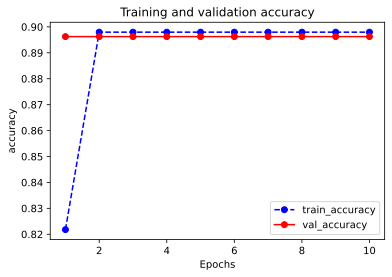

In [209]:
model.summary()


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(history,"accuracy")



In [408]:
# inventory_type_value = list(set(df['inventory_type'].sum()))
# 对inventory_type进行编码
for value in list(set(df[df['inventory_type'].notna()]['inventory_type'].sum())):
    exec("df['%s'] = df[df['inventory_type'].notna()]['inventory_type'].apply(lambda x:1 if '%s' in x else 0) "%(value,value))

In [410]:
# 对age进行编码
for value in list(set(df[df['age'].notna()]['age'].sum())):
    exec("df['%s'] = df[df['age'].notna()]['age'].apply(lambda x:1 if '%s' in x else 0) "%(value,value))

In [413]:
df['platform'] = df['platform'].apply(lambda x:1 if x==['ANDROID'] else 2)

In [422]:
# 对retargeting_tags_include进行编码
for value in list(set(df[df['retargeting_tags_include'].notna()]['retargeting_tags_include'].sum())):
    exec("df['retargeting_tags_include_'+'%s'] = df[df['retargeting_tags_include'].notna()]['retargeting_tags_include'].apply(lambda x:1 if %s in x else 0) "%(value,value))

In [428]:
# 对retargeting_tags_exclude进行编码
for value in list(set(df[df['retargeting_tags_exclude'].notna()]['retargeting_tags_exclude'].sum())):
    exec("df['retargeting_tags_exclude_'+'%s'] = df[df['retargeting_tags_exclude'].notna()]['retargeting_tags_exclude'].apply(lambda x:1 if %s in x else 0) "%(value,value))

In [433]:
# 对ac进行编码
for value in list(set(df[df['ac'].notna()]['ac'].sum())):
    exec("df['ac_'+'%s'] = df[df['ac'].notna()]['ac'].apply(lambda x:1 if '%s' in x else 0) "%(value,value))

In [523]:
df['action_scene_E-COMMERCE'].sum()

9933.0

In [556]:
df = df[df.columns.drop(list(df.filter(regex='action_words_')))]

In [542]:
df.head()

ad_account_id  game_id  channel_id  source_id create_time_y     bid2  \
0           4003  1000840        7162     259913    2020-01-19  1135.73   
1           4003  1000840        7162     259914    2020-01-19  1135.08   
2           4003  1000840        7162     259915    2020-01-19  1128.21   
3           4003  1000840        7162     259916    2020-01-19  1180.24   
4           4003  1000840        7162     259918    2020-01-19  1377.89   

    budget                                     inventory_type  \
0   5000.0                             [INVENTORY_UNION_SLOT]   
1   5000.0        [UNION_BOUTIQUE_GAME, INVENTORY_UNION_SLOT]   
2   5000.0        [UNION_BOUTIQUE_GAME, INVENTORY_UNION_SLOT]   
3   8000.0                             [INVENTORY_UNION_SLOT]   
4  10000.0  [INVENTORY_FEED, INVENTORY_HOTSOON_FEED, INVEN...   

                                       schedule_time delivery_range  \
0  1111111111111111111111111111111111111111111111...          UNION   
1  1111111111111111111111111111111111111111111111...        DEFAULT   
2  1111111111111111111111111111111111111111111111...        DEFAULT   
3  1111111111111111111111111111111111111111111111...          UNION   
4  1110000000000000000011111111111111111111111111...        DEFAULT   

        flow_control_mode          smart_bid_type  adjust_cpa  cpa_bid  \
0  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1135.73   
1  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1135.08   
2  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1128.21   
3  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1180.24   
4  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1377.89   

   hide_if_exists hide_if_converted  auto_extend_enabled  \
0               0                AD                    0   
1               0                AD                    0   
2               0                AD                    0   
3               0                AD                    0   
4               0                AD                    0   

                                                 age       gender  \
0  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   
1  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   
2  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   
3  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   
4  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   

                                                city location_type  platform  \
0                                                 []       CURRENT         1   
1                                                 []       CURRENT         1   
2                                                 []       CURRENT         1   
3                                                 []       CURRENT         1   
4  [11, 12, 13, 14, 15, 21, 22, 23, 31, 32, 33, 3...       CURRENT         1   

  launch_price retargeting_type retargeting_tags_include  \
0           []             NONE                       []   
1           []             NONE                       []   
2           []             NONE                       []   
3           []             NONE                       []   
4           []             NONE                       []   

  retargeting_tags_exclude  ac android_osv ios_osv interest_action_mode  \
0                       []  []        NONE    NONE            UNLIMITED   
1                       []  []        NONE    NONE            UNLIMITED   
2                       []  []        NONE    NONE            UNLIMITED   
3                       []  []        NONE    NONE            UNLIMITED   
4                       []  []        NONE    NONE            UNLIMITED   

  interest_categories interest_words action_categories  action_days  \
0                  []             []               NaN          NaN   
1                  []             []               NaN          NaN   
2      

In [437]:
# 对interest_categories进行编码
for value in list(set(df[df['interest_categories'].notna()]['interest_categories'].sum())):
    exec("df['interest_categories_'+'%s'] = df[df['interest_categories'].notna()]['interest_categories'].apply(lambda x:1 if %s in x else 0) "%(value,value))

In [448]:
# 对interest_words进行编码
%%time
s=pd.value_counts(df[df['interest_words'].notna()]['interest_words'].sum()).sort_values(ascending=False)
# word_value_list = s[s>s.mean()].index.tolist()
# df_word = df[['interest_words']]
for value in s[s>s.mean()].index.tolist():
    exec("df['interest_words_'+'%s'] = df[df['interest_words'].notna()]['interest_words'].apply(lambda x:1 if %s in x else 0) "%(value,value))

Wall time: 4min 13s


In [449]:
df.shape

(30169, 5111)

In [509]:
# 对action_categories进行编码
s = pd.value_counts(df[df['action_categories'].notna()]['action_categories'].sum()).sort_values(ascending=False)
for value in s[s>s.mean()/5].index.tolist():
    exec("df['action_categories_'+'%s'] = df[df['action_categories'].notna()]['action_categories'].apply(lambda x:1 if %s in x else 0) "%(value,value))

In [519]:
# 对action_scene进行编码
for value in list(set(df[df['action_scene'].notna()]['action_scene'].sum())):
    exec("df['action_scene_'+'%s'] = df[df['action_scene'].notna()]['action_scene'].apply(lambda x:1 if '%s' in x else 0) "%(value,value))

In [526]:
s = pd.value_counts(df[df['action_words'].notna()]['action_words'].sum()).sort_values(ascending=False)

In [529]:
len(s)

35965

In [553]:
s.mean()

41.210927290421246

In [554]:
len(s[s>400].index.tolist())

723

In [720]:
df['action_words'].isna().sum()

18005

In [725]:
%%time
# 对action_words进行编码
s = pd.value_counts(df[df['action_words'].notna()]['action_words'].sum()).sort_values(ascending=False)
for value in s[s>400].index.tolist():
    exec("df['action_words_'+'%s'] = df[df['action_words'].notna()]['action_words'].apply(lambda x:1 if %s in x else 0) "%(value,value))

Wall time: 6min 35s


In [726]:
df.shape

(30169, 5949)

In [731]:
df['ad_account_id'].nunique()

276

In [727]:
df.head()

ad_account_id  game_id  channel_id  source_id create_time_y     bid2  \
0           4003  1000840        7162     259913    2020-01-19  1135.73   
1           4003  1000840        7162     259914    2020-01-19  1135.08   
2           4003  1000840        7162     259915    2020-01-19  1128.21   
3           4003  1000840        7162     259916    2020-01-19  1180.24   
4           4003  1000840        7162     259918    2020-01-19  1377.89   

    budget                                     inventory_type  \
0   5000.0                             [INVENTORY_UNION_SLOT]   
1   5000.0        [UNION_BOUTIQUE_GAME, INVENTORY_UNION_SLOT]   
2   5000.0        [UNION_BOUTIQUE_GAME, INVENTORY_UNION_SLOT]   
3   8000.0                             [INVENTORY_UNION_SLOT]   
4  10000.0  [INVENTORY_FEED, INVENTORY_HOTSOON_FEED, INVEN...   

                                       schedule_time delivery_range  \
0  1111111111111111111111111111111111111111111111...          UNION   
1  1111111111111111111111111111111111111111111111...        DEFAULT   
2  1111111111111111111111111111111111111111111111...        DEFAULT   
3  1111111111111111111111111111111111111111111111...          UNION   
4  1110000000000000000011111111111111111111111111...        DEFAULT   

        flow_control_mode          smart_bid_type  adjust_cpa  cpa_bid  \
0  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1135.73   
1  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1135.08   
2  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1128.21   
3  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1180.24   
4  FLOW_CONTROL_MODE_FAST  SMART_BID_CONSERVATIVE         0.0  1377.89   

   hide_if_exists hide_if_converted  auto_extend_enabled  \
0               0                AD                    0   
1               0                AD                    0   
2               0                AD                    0   
3               0                AD                    0   
4               0                AD                    0   

                                                 age       gender  \
0  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   
1  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   
2  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   
3  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   
4  [AGE_BETWEEN_24_30, AGE_BETWEEN_31_40, AGE_BET...  GENDER_MALE   

                                                city location_type  platform  \
0                                                 []       CURRENT         1   
1                                                 []       CURRENT         1   
2                                                 []       CURRENT         1   
3                                                 []       CURRENT         1   
4  [11, 12, 13, 14, 15, 21, 22, 23, 31, 32, 33, 3...       CURRENT         1   

  launch_price retargeting_type retargeting_tags_include  \
0           []             NONE                       []   
1           []             NONE                       []   
2           []             NONE                       []   
3           []             NONE                       []   
4           []             NONE                       []   

  retargeting_tags_exclude  ac android_osv ios_osv interest_action_mode  \
0                       []  []        NONE    NONE            UNLIMITED   
1                       []  []        NONE    NONE            UNLIMITED   
2                       []  []        NONE    NONE            UNLIMITED   
3                       []  []        NONE    NONE            UNLIMITED   
4                       []  []        NONE    NONE            UNLIMITED   

  interest_categories interest_words action_categories  action_days  \
0                  []             []               NaN          NaN   
1                  []             []               NaN          NaN   
2      

In [730]:
df['action_words_76189'].sum()

1590.0

In [520]:
df.shape

(30169, 5226)

In [396]:
from sklearn.decomposition import PCA

In [403]:
pca = PCA(n_components=50)
new = pca.fit_transform(df_word.values)

In [404]:
new

array([[-1.01051232,  0.10507635,  0.06229031, ..., -0.00393409,
         0.0036856 ,  0.00117276],
       [-1.01051232,  0.10507635,  0.06229031, ..., -0.00393409,
         0.0036856 ,  0.00117276],
       [-1.01051232,  0.10507635,  0.06229031, ..., -0.00393409,
         0.0036856 ,  0.00117276],
       ...,
       [-1.01051232,  0.10507635,  0.06229031, ..., -0.00393409,
         0.0036856 ,  0.00117276],
       [-1.01051232,  0.10507635,  0.06229031, ..., -0.00393409,
         0.0036856 ,  0.00117276],
       [-1.01051232,  0.10507635,  0.06229031, ..., -0.00393409,
         0.0036856 ,  0.00117276]])

In [405]:
pca.explained_variance_ratio_[0:50].sum()

0.8667537548162463

In [732]:
df_test = df[['action_categories']]

In [735]:
df_test['action_categories'].value_counts()

[1602, 160401, 160407, 160413, 160426, 160432, 160435, 160437, 160443]                    2524
[]                                                                                        1294
[16]                                                                                      1085
[160201, 160203, 160204, 160205, 160206, 160207, 160212, 160214, 160215, 160216, 1604]     408
[160407]                                                                                   338
                                                                                          ... 
[16020302, 16020304, 16020501, 160214, 160227, 160437, 160401, 160407]                       1
[160407, 16020302, 16020304]                                                                 1
[16, 11020102, 20, 3]                                                                        1
[160401, 160407, 160437, 160214, 16020302, 16020304, 16020501]                               1
[16, 18, 8, 3, 1, 2]                              

In [ ]:
import tensorflow as tf

TAG_SET=list(set(df[df['action_categories'].notna()]['action_scene'].sum())) ##表示所有items的集合##
def sparse_from_csv(csv):
    post_tags_str=list(csv)
    table = tf.lookup.StaticHashTable(
        tf.lookup.KeyValueTensorInitializer(list(key2index.keys()),list(key2index.values())), default_value=-1) ## 这里构造了个查找表 ##
    split_tags=tf.strings.split(csv," ")
    split_tags=tf.RaggedTensor.to_sparse(split_tags)
    return tf.SparseTensor(
        indices=split_tags.indices,
        values=table.lookup(split_tags.values), ## 这里给出了不同值通过表查到的index ##
        dense_shape=split_tags.dense_shape)
EMBEDDING_DIM=16 ##embedding向量的维数##
embedding_params=tf.Variable(tf.random.truncated_normal([len(TAG_SET)+1,EMBEDDING_DIM]))
tags=sparse_from_csv(train['item_id'])
embedded_tags=tf.nn.embedding_lookup_sparse(embedding_params,sp_ids=tags,sp_weights=None)


In [ ]:
tf.feature_column.embedding_column

In [ ]:
tf.nn.embedding_lookup_sparse

In [207]:
city_value = list(set(df['city'].sum()))

In [208]:
len(city_value)

396

In [454]:
df['action_days'].values

array(['NONE', 'NONE', 'NONE', ..., '8.0', 'NONE', 'NONE'], dtype=object)

In [525]:
df['action_words'].isna().sum()

18005

In [676]:
df_action_words = df[['action_words']]

In [594]:
from sklearn.preprocessing import LabelEncoder

In [664]:
LE = LabelEncoder()
LE.fit(['aa','bb'])

LabelEncoder()

In [ ]:
LabelEncoder

In [572]:
list(list_1)

[([], 0),
 ([80925,
   336504,
   183617272,
   50105430,
   16391,
   488760219,
   58058600,
   126187247,
   433201,
   488760220,
   22506,
   359209,
   64887648,
   2776046,
   49278742,
   85715,
   91655,
   65508,
   285227,
   2427337,
   60054,
   199812,
   233625650,
   2421723,
   2443854,
   2411020,
   555766,
   16657],
  1),
 ([299422,
   56319314,
   538633,
   294432,
   325231799,
   72658287,
   2427308,
   47780312,
   2558907,
   48181161,
   218389985,
   101671,
   523225439,
   21135,
   640314934,
   46075,
   672975083,
   172859348,
   236205,
   512593410,
   1174365469,
   1275108648],
  2),
 ([545104367,
   199812,
   2261254392,
   49278742,
   2684686,
   2427337,
   3495789,
   65316,
   57593167,
   2398928811,
   336504,
   708899795,
   626856,
   16391,
   1161606585,
   391508,
   60054,
   1185601658,
   2907476,
   22506,
   303357188,
   2776046,
   2888521,
   3189547,
   572043213,
   619566677,
   126187247,
   58058600,
   64887648,
   14

In [565]:
s

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               2607
[8

In [564]:
len(s)

34

In [252]:
value = list(set(df['retargeting_tags_exclude'].sum()))

In [253]:
len(value)

457

In [736]:
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models

In [737]:
data = pd.DataFrame({'A':[23,12,34,32],'B':['男','女','未知','男'],'C':[[12,23],[22,32],[23],[22,34]]})

In [738]:
data

A   B         C
0  23   男  [12, 23]
1  12   女  [22, 32]
2  34  未知      [23]
3  32   男  [22, 34]

In [739]:
feature_columns = []

In [740]:
feature_columns.append(tf.feature_column.numeric_column('A'))

In [742]:
age = tf.feature_column.numeric_column('A')
age_buckets = tf.feature_column.bucketized_column(age,boundaries=[18,30])
feature_columns.append(age_buckets)

In [745]:
sex = tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_vocabulary_list(key='B',vocabulary_list=['男','女','未知']))
feature_columns.append(sex)

In [746]:
feature_columns

[NumericColumn(key='A', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 BucketizedColumn(source_column=NumericColumn(key='A', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(18, 30)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='B', vocabulary_list=('男', '女', '未知'), dtype=tf.string, default_value=-1, num_oov_buckets=0))]

In [279]:
embedding = tf.constant(
    [
        [0.21,0.41,0.51,0.11],
        [0.22,0.42,0.52,0.12],
        [0.23,0.43,0.53,0.13],
        [0.24,0.44,0.54,0.14]
    ],dtype=tf.float32)

feature_batch = tf.constant([2,3,1,0])

get_embedding1 = tf.nn.embedding_lookup(embedding,feature_batch)

feature_batch_one_hot = tf.one_hot(feature_batch,depth=4)

get_embedding2 = tf.matmul(feature_batch_one_hot,embedding)
print(get_embedding1.numpy().tolist())

[[0.23000000417232513, 0.4300000071525574, 0.5299999713897705, 0.12999999523162842], [0.23999999463558197, 0.4399999976158142, 0.5400000214576721, 0.14000000059604645], [0.2199999988079071, 0.41999998688697815, 0.5199999809265137, 0.11999999731779099], [0.20999999344348907, 0.4099999964237213, 0.5099999904632568, 0.10999999940395355]]


In [288]:
num_classes=10

input_x = tf.keras.Input(shape=(None,),)
em = layers.Embedding(num_classes, 10)
embedding_x = em(input_x)
fc = layers.Dense(50,activation='relu')
hidden1 = fc(embedding_x)
output = layers.Dense(2,activation='softmax')(hidden1)

x_train = [2,3,4,5,8,1,6,7,2,3,4,5,8,1,6,7,2,3,4,5,8,1,6,7,2,3,4,5,8,1,6,7,2,3,4,5,8,1,6,7,2,3,4,5,8,1,6,7,2,3,4,5,8,1,6,7,2,3,4,5,8,1,6,7]
y_train = [0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1]

model2 = tf.keras.Model(inputs = input_x,outputs = output)

model2.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model2.fit(x_train, y_train, batch_size=4, epochs=1000)

Epoch 1/1000
16/16 [==============================] - 0s 813us/step - loss: 0.6868 - accuracy: 0.7656
Epoch 2/1000
16/16 [==============================] - 0s 750us/step - loss: 0.6707 - accuracy: 1.0000
Epoch 3/1000
16/16 [==============================] - 0s 812us/step - loss: 0.6478 - accuracy: 1.0000
Epoch 4/1000
16/16 [==============================] - 0s 813us/step - loss: 0.6093 - accuracy: 1.0000
Epoch 5/1000
16/16 [==============================] - 0s 813us/step - loss: 0.5426 - accuracy: 1.0000
Epoch 6/1000
16/16 [==============================] - 0s 812us/step - loss: 0.4436 - accuracy: 1.0000
Epoch 7/1000
16/16 [==============================] - 0s 688us/step - loss: 0.3253 - accuracy: 1.0000
Epoch 8/1000
16/16 [==============================] - 0s 750us/step - loss: 0.2145 - accuracy: 1.0000
Epoch 9/1000
16/16 [==============================] - 0s 687us/step - loss: 0.1300 - accuracy: 1.0000
Epoch 10/1000
16/16 [==============================] - 0s 812us/step - loss: 0.078

16/16 [==============================] - 0s 688us/step - loss: 3.6988e-05 - accuracy: 1.0000
Epoch 155/1000
16/16 [==============================] - 0s 750us/step - loss: 3.6358e-05 - accuracy: 1.0000
Epoch 156/1000
16/16 [==============================] - 0s 1ms/step - loss: 3.5738e-05 - accuracy: 1.0000
Epoch 157/1000
16/16 [==============================] - 0s 750us/step - loss: 3.5134e-05 - accuracy: 1.0000
Epoch 158/1000
16/16 [==============================] - 0s 875us/step - loss: 3.4527e-05 - accuracy: 1.0000
Epoch 159/1000
16/16 [==============================] - 0s 813us/step - loss: 3.3952e-05 - accuracy: 1.0000
Epoch 160/1000
16/16 [==============================] - 0s 937us/step - loss: 3.3387e-05 - accuracy: 1.0000
Epoch 161/1000
16/16 [==============================] - 0s 1ms/step - loss: 3.2832e-05 - accuracy: 1.0000
Epoch 162/1000
16/16 [==============================] - 0s 1ms/step - loss: 3.2298e-05 - accuracy: 1.0000
Epoch 163/1000
16/16 [===========================

16/16 [==============================] - 0s 687us/step - loss: 4.6212e-06 - accuracy: 1.0000
Epoch 307/1000
16/16 [==============================] - 0s 875us/step - loss: 4.5653e-06 - accuracy: 1.0000
Epoch 308/1000
16/16 [==============================] - 0s 813us/step - loss: 4.5262e-06 - accuracy: 1.0000
Epoch 309/1000
16/16 [==============================] - 0s 750us/step - loss: 4.4554e-06 - accuracy: 1.0000
Epoch 310/1000
16/16 [==============================] - 0s 625us/step - loss: 4.4200e-06 - accuracy: 1.0000
Epoch 311/1000
16/16 [==============================] - 0s 813us/step - loss: 4.3660e-06 - accuracy: 1.0000
Epoch 312/1000
16/16 [==============================] - 0s 687us/step - loss: 4.3064e-06 - accuracy: 1.0000
Epoch 313/1000
16/16 [==============================] - 0s 938us/step - loss: 4.2729e-06 - accuracy: 1.0000
Epoch 314/1000
16/16 [==============================] - 0s 625us/step - loss: 4.2096e-06 - accuracy: 1.0000
Epoch 315/1000
16/16 [=====================

Epoch 457/1000
16/16 [==============================] - 0s 687us/step - loss: 9.2387e-07 - accuracy: 1.0000
Epoch 458/1000
16/16 [==============================] - 0s 625us/step - loss: 9.0897e-07 - accuracy: 1.0000
Epoch 459/1000
16/16 [==============================] - 0s 688us/step - loss: 8.7917e-07 - accuracy: 1.0000
Epoch 460/1000
16/16 [==============================] - 0s 750us/step - loss: 8.6427e-07 - accuracy: 1.0000
Epoch 461/1000
16/16 [==============================] - 0s 875us/step - loss: 8.6427e-07 - accuracy: 1.0000
Epoch 462/1000
16/16 [==============================] - 0s 625us/step - loss: 8.6427e-07 - accuracy: 1.0000
Epoch 463/1000
16/16 [==============================] - 0s 688us/step - loss: 8.6427e-07 - accuracy: 1.0000
Epoch 464/1000
16/16 [==============================] - 0s 750us/step - loss: 8.6240e-07 - accuracy: 1.0000
Epoch 465/1000
16/16 [==============================] - 0s 813us/step - loss: 8.3633e-07 - accuracy: 1.0000
Epoch 466/1000
16/16 [======

16/16 [==============================] - 0s 875us/step - loss: 2.0862e-07 - accuracy: 1.0000
Epoch 608/1000
16/16 [==============================] - 0s 1ms/step - loss: 2.0862e-07 - accuracy: 1.0000
Epoch 609/1000
16/16 [==============================] - 0s 875us/step - loss: 2.0489e-07 - accuracy: 1.0000
Epoch 610/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.9372e-07 - accuracy: 1.0000
Epoch 611/1000
16/16 [==============================] - 0s 938us/step - loss: 1.9372e-07 - accuracy: 1.0000
Epoch 612/1000
16/16 [==============================] - 0s 938us/step - loss: 1.9372e-07 - accuracy: 1.0000
Epoch 613/1000
16/16 [==============================] - 0s 938us/step - loss: 1.9372e-07 - accuracy: 1.0000
Epoch 614/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.9372e-07 - accuracy: 1.0000
Epoch 615/1000
16/16 [==============================] - 0s 875us/step - loss: 1.9372e-07 - accuracy: 1.0000
Epoch 616/1000
16/16 [===========================

16/16 [==============================] - 0s 625us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 759/1000
16/16 [==============================] - 0s 750us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 760/1000
16/16 [==============================] - 0s 625us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 761/1000
16/16 [==============================] - 0s 687us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 762/1000
16/16 [==============================] - 0s 750us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 763/1000
16/16 [==============================] - 0s 688us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 764/1000
16/16 [==============================] - 0s 688us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 765/1000
16/16 [==============================] - 0s 687us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 766/1000
16/16 [==============================] - 0s 750us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 767/1000
16/16 [=====================

Epoch 909/1000
16/16 [==============================] - 0s 750us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 910/1000
16/16 [==============================] - 0s 750us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 911/1000
16/16 [==============================] - 0s 750us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 912/1000
16/16 [==============================] - 0s 813us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 913/1000
16/16 [==============================] - 0s 875us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 914/1000
16/16 [==============================] - 0s 813us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 915/1000
16/16 [==============================] - 0s 688us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 916/1000
16/16 [==============================] - 0s 625us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 917/1000
16/16 [==============================] - 0s 687us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 918/1000
16/16 [======

In [ ]:
model